In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
import plotly.offline as plt
import plotly.graph_objs as go

In [3]:
data = pd.read_csv('winemag-data-130k-v2.csv', error_bad_lines = False)

In [4]:
len(data)

129971

In [5]:
# удаляем ненужные столбцы, оставим для анализа только столбец с ценой и кол-вом баллов
data.pop('Unnamed: 0')
data.pop('description')
data.pop('region_1')
data.pop('region_2')
data.pop('taster_name')
data.pop('taster_twitter_handle')
data.pop('title')
data.pop('country')
data.pop('designation')
data.pop('province')
data.pop('variety')
data.pop('winery')

0                                          Nicosia
1                              Quinta dos Avidagos
2                                        Rainstorm
3                                       St. Julian
4                                     Sweet Cheeks
                            ...                   
129966    Dr. H. Thanisch (Erben Müller-Burggraef)
129967                                    Citation
129968                             Domaine Gresser
129969                        Domaine Marcel Deiss
129970                            Domaine Schoffit
Name: winery, Length: 129971, dtype: object

In [6]:
k_means = (data.sample(n = 5, replace=False))  #сохраняем текущие значения, указываем кол-во кластеров 
k_means2 = pd.DataFrame()                      # сохраняем предыдущие значения
clusters = pd.DataFrame()                      # сохраняем расстояния 

In [9]:
# на каждом проходе мы сравниваем значения текущие и предыдущие, 
# продолжаем проходить по алгоритму, пока данные не совпадут - точки разобьются по подходящим кластерам
while not k_means2.equals(k_means):
    # считаем расстояния 
    cluster_count = 0
    for idx, k_mean in k_means.iterrows():
        clusters[cluster_count] = (data[k_means.columns] - np.array(k_mean)).pow(2).sum(1).pow(0.5)
        cluster_count += 1
    data['Cluster'] = clusters.idxmin(axis=1)

    k_means2 = k_means
    k_means = pd.DataFrame()
    k_means_frame = data.groupby('Cluster').agg(np.mean)

    k_means[k_means_frame.columns] = k_means_frame[k_means_frame.columns]

In [10]:
clusters

,0,1,2,3,4
0,0.206149,6.747087,8.588710,2.991187,4.765122
1,4.542439,320.056025,1128.637331,32.512506,86.951006
2,5.541594,321.055803,1129.637302,33.508391,87.949520
3,6.541008,322.055583,1130.637273,34.504514,88.948068
4,45.462709,270.069193,1078.638846,17.877397,37.127398
...,...,...,...,...,...
129966,8.911517,307.007767,1115.618650,19.374619,73.841438
129967,55.532565,260.011901,1068.619265,27.625384,26.878359
129968,10.828855,305.007917,1113.618675,17.374620,71.842025
129969,12.771572,303.008069,1111.618700,15.374620,69.842646


Примеры пересчитывания класстеров на каждой итерации, всего итераций было около 43
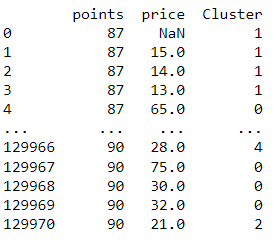
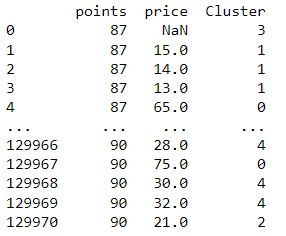
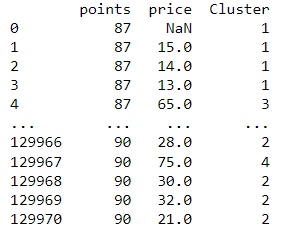
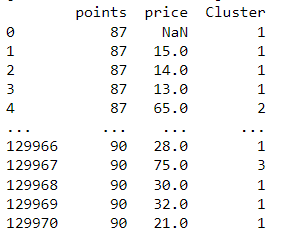

In [12]:
# визуализация
data_graph = [go.Scatter(
              x = data['price'],
              y = data['points'].where(data['Cluster'] == c),
              mode = 'markers',
              name = 'Cluster: ' + str(c)
              ) for c in range(5)]

data_graph.append(
    go.Scatter(
        x = k_means['price'],
        y = k_means['points'],
        mode='markers',
        marker = dict(
            size = 10,
            color = '#000000',
        ),
        name = 'Centroids of Clusters'
    )
)
plt.plot(data_graph, filename='cluster.html')

'cluster.html'

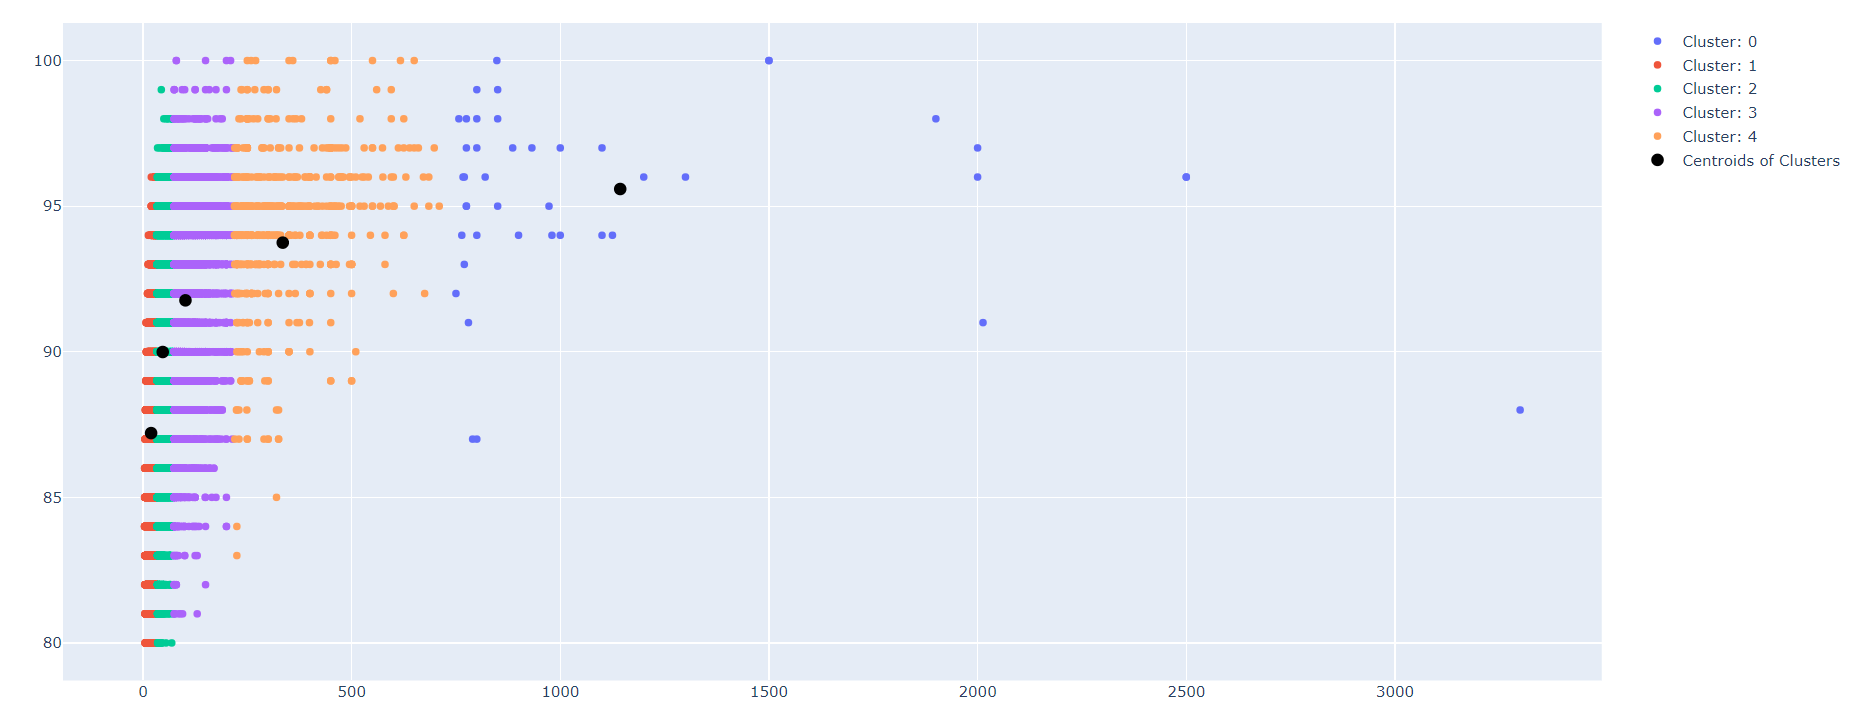

x - price
y - points

По результатам исследования, можно сказать, что точки с х=1500 до х=3000+ являются аномалиями(т.к это единичные данные), в дальнейшем исследовании их можно объединить в отдельный кластер.
По кластеру видно, что некоторые бутылки по своей цене не уступают качеству(в исследовании за этот параметр мы взяли оценку WineEnthusiast).
Также видно, что самые дорогие бутылки относятся к 0 кластеру, самые дешевые к 1 кластеру. 
Наиболее качетсвенные и бюджетные бутылки находятся в 3 и 4 кластерах.